<a href="https://colab.research.google.com/github/yj2811/Yoga-Pose-Classification/blob/main/keypoint_identification_posenet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keypoint Identification using Posenet (Pytorch)

In [1]:
!git clone https://github.com/rwightman/posenet-pytorch


Cloning into 'posenet-pytorch'...
remote: Enumerating objects: 115, done.
remote: Total 115 (delta 0), reused 0 (delta 0), pack-reused 115
Receiving objects: 100% (115/115), 34.73 KiB | 592.00 KiB/s, done.
Resolving deltas: 100% (62/62), done.


In [2]:
%cd posenet-pytorch

/content/posenet-pytorch


In [3]:
import os

In [4]:
import cv2


In [5]:
import torch


In [6]:
import posenet


In [7]:
import tensorflow as tf


In [8]:
import matplotlib.pyplot as plt


In [10]:
# !pip install tfjs-graph-converter


In [11]:
import torch
from posenet.constants import *
from posenet.decode_multi import decode_multiple_poses
from posenet.models.model_factory import load_model
from posenet.utils import *

net = load_model(101)
net = net.cuda()
output_stride = net.output_stride
scale_factor = 1.0

Cannot find models file ./_models/mobilenet_v1_101.pth, converting from tfjs...
Weights for checkpoint mobilenet_v1_101 are not downloaded. Downloading to /tmp/_posenet_weights ...


In [12]:
def posenet_model(file):
    input_image, draw_image, output_scale = posenet.read_imgfile(file, scale_factor=scale_factor, output_stride=output_stride)
    with torch.no_grad():
        input_image = torch.Tensor(input_image).cuda()

        heatmaps_result, offsets_result, displacement_fwd_result, displacement_bwd_result = net(input_image)

        pose_scores, keypoint_scores, keypoint_coords = posenet.decode_multiple_poses(
            heatmaps_result.squeeze(0),
            offsets_result.squeeze(0),
            displacement_fwd_result.squeeze(0),
            displacement_bwd_result.squeeze(0),
            output_stride=output_stride,
            max_pose_detections=10,
            min_pose_score=0.25)
        
        #Find keypoints on the image
        image = plt.imread(file)
        poses = []
        
        for pi in range(len(pose_scores)):
            if pose_scores[pi] != 0.:
                print('Pose #%d, score = %f' % (pi, pose_scores[pi]))       
                keypoints = keypoint_coords.astype(np.int32) 
                print(keypoints[pi])
                poses.append(keypoints[pi])
        
        #Show keypoints on the image
        img = plt.imread(file)
        i=0
        pose = poses[i]
        plt.imshow(img)    
        for y,x in pose:
            plt.plot(x, y, 'w.') 
            plt.text(x, y, str(i), color='r', fontsize=10)
            i+=1   
        plt.show()

In [13]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [14]:
file = '/content/drive/MyDrive/evolv-fit/yoga pose/Train/goddess/00000096.jpg'

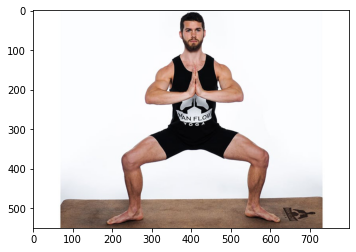

In [15]:
import matplotlib.pyplot as plt
img = plt.imread(file)
plt.imshow(img)
plt.show()


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Pose #0, score = 0.523821
[[ 64 406]
 [ 51 417]
 [ 50 391]
 [ 59 432]
 [ 62 374]
 [146 463]
 [146 353]
 [218 517]
 [221 301]
 [209 437]
 [213 382]
 [305 453]
 [303 370]
 [375 575]
 [373 237]
 [483 554]
 [494 258]]


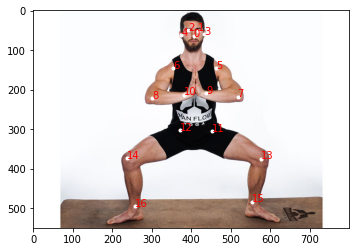

In [16]:
posenet_model(file)